<a href="https://colab.research.google.com/github/tanvir0188/plant-and-crop-pest-detection/blob/main/ml_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import zipfile



drive.mount('/content/drive')

with zipfile.ZipFile('/content/drive/My Drive/archive.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/dataset')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

dataset_path = '/content/dataset'

# Data Pre-processing

In [ ]:
# List classes and their respective number of images
class_info = {}

# Loop through each class folder
for label in os.listdir(dataset_path):
    class_folder = os.path.join(dataset_path, label)

    # Ensure it's a directory
    if os.path.isdir(class_folder):
        class_images = os.listdir(class_folder)
        class_info[label] = len(class_images)  # Count number of images

# Display the class info
print("Class Distribution:")
for label, count in class_info.items():
    print(f"{label}: {count} images")

for label in class_info.keys():
    class_folder = os.path.join(dataset_path, label)
    sample_images = os.listdir(class_folder)[:5]  # Get first 5 images
    print(f"\nSample images in '{label}': {sample_images}")

Class Distribution:
Cassava mosaic: 1205 images
Cassava healthy: 1193 images
Cashew anthracnose: 1729 images
Maize streak virus: 979 images
Cassava bacterial blight: 2614 images
Maize grasshoper: 673 images
Maize fall armyworm: 285 images
Tomato verticulium wilt: 773 images
Cashew healthy: 1368 images
Tomato septoria leaf spot: 2743 images
Cashew gumosis: 392 images
Cashew leaf miner: 1378 images
Cashew red rust: 1682 images
Maize leaf blight: 1006 images
Cassava green mite: 1015 images
Maize healthy: 208 images
Tomato leaf blight: 1301 images
Maize leaf beetle: 948 images
Tomato healthy: 470 images
Maize leaf spot: 1259 images
Cassava brown spot: 1481 images
Tomato leaf curl: 518 images

Sample images in 'Cassava mosaic': ['mosaic1027_.jpg', 'mosaic912_.jpg', 'mosaic1164_.jpg', 'mosaic427_.jpg', 'mosaic33_.jpg']

Sample images in 'Cassava healthy': ['healthy1014_.jpg', 'healthy474_.jpg', 'healthy246_.jpg', 'healthy1013_.jpg', 'healthy811_.jpg']

Sample images in 'Cashew anthracnose': 

In [ ]:
# Define the ImageDataGenerator with rescaling and augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,              # Rescale pixel values
    rotation_range=20,            # Randomly rotate images
    width_shift_range=0.2,        # Randomly shift images horizontally
    height_shift_range=0.2,       # Randomly shift images vertically
    shear_range=0.2,              # Shear transformation
    zoom_range=0.2,               # Random zoom
    horizontal_flip=True,         # Flip images horizontally
    fill_mode='nearest',          # Fill any newly created pixels after transformations
    validation_split=0.2          # Use 20% of data for validation
)

# Test data will only have rescaling
test_datagen = ImageDataGenerator(rescale=1./255)


In [ ]:
batch_size = 32
image_size = (150, 150)  # You can adjust the target image size based on your model input requirement

# Training data generator
train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',    # Use 'categorical' for multi-class classification
    subset='training'            # Set to 'training' subset
)

# Validation data generator
validation_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'          # Set to 'validation' subset
)

# Test data generator (if you have a separate test set)
test_generator = test_datagen.flow_from_directory(
    dataset_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)


Found 20186 images belonging to 22 classes.
Found 5034 images belonging to 22 classes.
Found 25220 images belonging to 22 classes.


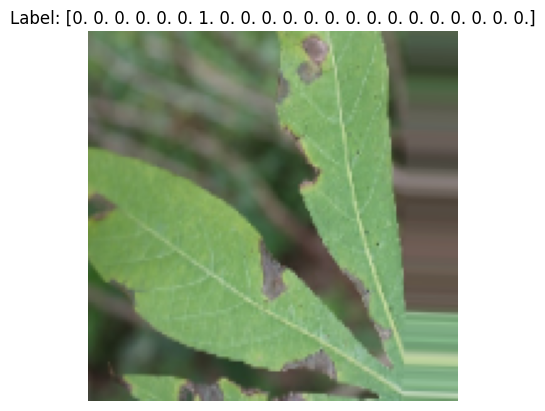

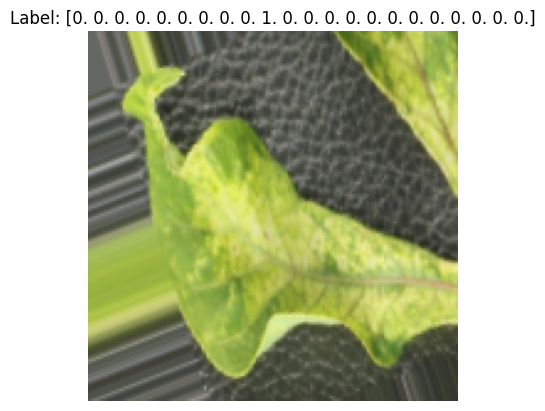

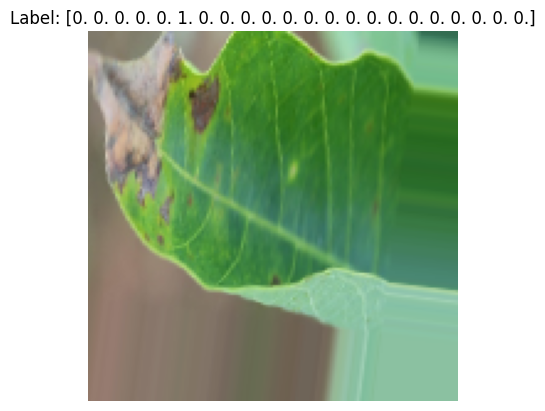

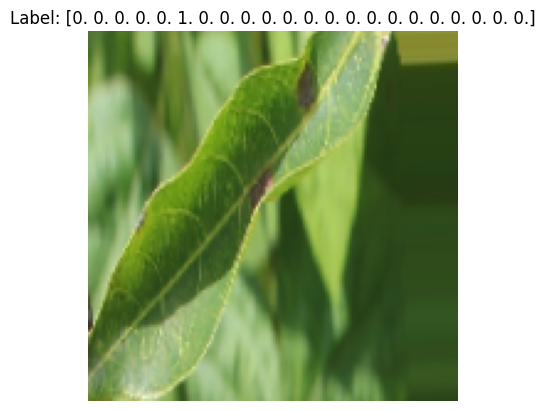

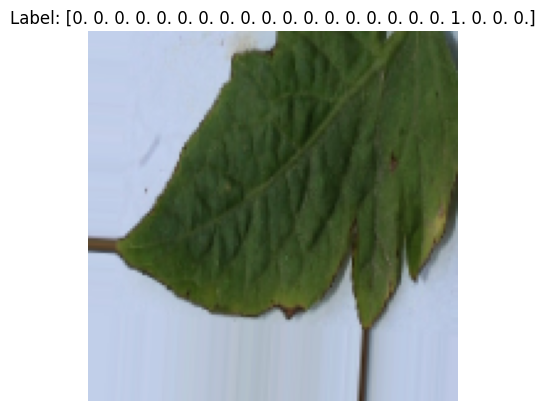

In [ ]:
import matplotlib.pyplot as plt

# Retrieve a batch of training images
sample_batch, sample_labels = next(train_generator)

# Plot a few sample images
for i in range(5):
    plt.imshow(sample_batch[i])
    plt.title(f"Label: {sample_labels[i]}")
    plt.axis('off')
    plt.show()


In [ ]:
!pip install opencv-python


In [ ]:
import cv2
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

# Function to apply noise reduction
def reduce_noise(image):
    # Apply Gaussian blur for noise reduction
    return cv2.GaussianBlur(image, (5, 5), 0)

# Function to apply image segmentation (Canny edge detection for simplicity)
def segment_image(image):
    # Convert image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Apply Canny edge detection
    edges = cv2.Canny(gray_image, threshold1=30, threshold2=100)
    return edges

# Function to extract features using HOG
def extract_features(image):
    # Use Histogram of Oriented Gradients (HOG) for feature extraction
    image = cv2.resize(image, (64, 128))
    hog = cv2.HOGDescriptor()
    h = hog.compute(image)
    return h

# Function to crop the image (you can implement a more dynamic cropping logic based on the segmentation)
def crop_image(image):
    # Here we simply crop the center of the image
    height, width = image.shape[:2]
    start_row, start_col = int(height * 0.25), int(width * 0.25)
    end_row, end_col = int(height * 0.75), int(width * 0.75)
    return image[start_row:end_row, start_col:end_col]

# Function to resize the image to the required dimensions
def resize_image(image, target_size=(150, 150)):
    return cv2.resize(image, target_size)

# Directory paths
dataset_path = '/content/dataset'
processed_data_path = '/content/processed_dataset'

# Create directory to save processed images
if not os.path.exists(processed_data_path):
    os.makedirs(processed_data_path)

# Loop through each class folder
for label in os.listdir(dataset_path):
    class_folder = os.path.join(dataset_path, label)

    if os.path.isdir(class_folder):
        # Create corresponding folder in processed dataset
        processed_class_folder = os.path.join(processed_data_path, label)
        if not os.path.exists(processed_class_folder):
            os.makedirs(processed_class_folder)

        for image_name in os.listdir(class_folder):
            image_path = os.path.join(class_folder, image_name)

            # Load the image and check if it was successful
            image = cv2.imread(image_path)
            if image is None:
                print(f"Error loading image: {image_path}. Skipping.")
                continue  # Skip this image if it's not loaded

            # Step 1: Apply noise reduction
            denoised_image = reduce_noise(image)

            # Step 2: Apply image segmentation
            segmented_image = segment_image(denoised_image)

            # Step 3: Extract features (optional for some models, but useful for custom processing)
            features = extract_features(denoised_image)

            # Step 4: Crop the image
            cropped_image = crop_image(denoised_image)

            # Step 5: Resize the image to standard size
            resized_image = resize_image(cropped_image, target_size=(150, 150))

            # Save the preprocessed image
            processed_image_path = os.path.join(processed_class_folder, image_name)
            cv2.imwrite(processed_image_path, resized_image)

print("Preprocessing complete.")


Error loading image: /content/dataset/Maize streak virus/streak virus627_.jpg. Skipping.
Error loading image: /content/dataset/Maize streak virus/streak virus422_.jpg. Skipping.
Error loading image: /content/dataset/Maize streak virus/streak virus774_.jpg. Skipping.
Error loading image: /content/dataset/Maize streak virus/streak virus701_.jpg. Skipping.
Error loading image: /content/dataset/Maize streak virus/streak virus119_.jpg. Skipping.
Error loading image: /content/dataset/Maize streak virus/streak virus486_.jpg. Skipping.
Error loading image: /content/dataset/Maize streak virus/streak virus998_.jpg. Skipping.
Error loading image: /content/dataset/Maize leaf blight/leaf blight453_.jpg. Skipping.
Error loading image: /content/dataset/Maize leaf blight/leaf blight746_.jpg. Skipping.
Error loading image: /content/dataset/Maize leaf blight/leaf blight667_.jpg. Skipping.
Error loading image: /content/dataset/Maize leaf blight/leaf blight830_.jpg. Skipping.
Error loading image: /content

SVM

In [ ]:
import cv2
import os
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Directory path for the processed data
processed_data_path = '/content/processed_dataset'

# Prepare data lists
X = []  # Feature list
y = []  # Label list

# Loop through each class folder to extract features and prepare labels
for label in os.listdir(processed_data_path):
    class_folder = os.path.join(processed_data_path, label)

    if os.path.isdir(class_folder):
        for image_name in os.listdir(class_folder):
            image_path = os.path.join(class_folder, image_name)

            # Load the preprocessed image
            image = cv2.imread(image_path)
            if image is None:
                print(f"Error loading image: {image_path}. Skipping.")
                continue
            # Flatten the features to a 1D array and append to the feature list
            X.append(features.flatten())  # Already using the HOG feature extraction
            y.append(label)  # Append the corresponding label

# Step 2: Convert the data and labels into numpy arrays
X = np.array(X)
y = np.array(y)

# Step 3: Encode the labels into numerical values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Step 5: Train the SVM classifier
svm_model = SVC(kernel='linear')  # You can experiment with different kernels (e.g., 'rbf')
svm_model.fit(X_train, y_train)

# Step 6: Predict on the test set
y_pred = svm_model.predict(X_test)

# Step 7: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"SVM Accuracy: {accuracy * 100:.2f}%")


SVM Accuracy: 10.85%
